# Sequential tutorial using interactive Jupyter notebook
This tutorial performs a similar analysis to that shown in the 1_build_database.py, 2_setup.py, and 3_analysis.py. The main difference is that some intuition is built as the code is pieced together and explained.

## Build database
Data setup can be done any number of ways. The 1_build_database.py uses the dataset.json to structure the input, but we can make a less modular version of the script by specifying the input.

In [1]:
import MILK
from pathlib import Path

group = MILK.generateGroup.group()
config = MILK.load_json('milk.json')
group.parseConfig(config=config,
                  dataset=None,
                  data_fnames=sorted([file.name for file in Path('data').glob('*.chi')]),
                  run_dirs='run(wild)',
                  ifile='templates/template_4768.par', 
                  ofile='Initial.par', 
                  data_dir='data', 
                  ext='.chi')
print(group.__dict__)


{'filename': 'dataset.csv', 'run_dirs': 'run(wild)', 'ifile': 'templates/template_4768.par', 'ofile': 'Initial.par', 'data_dir': 'data', 'ext': '.chi', 'args': None, 'data_fnames': ['PWDR_ff_004329_sum_norm_dc_0_tif_A352_fxye_Bank_1.chi', 'PWDR_ff_004331_sum_norm_dc_0_tif_A352_fxye_Bank_1.chi', 'PWDR_ff_004332_sum_norm_dc_0_tif_A352_fxye_Bank_1.chi', 'PWDR_ff_004333_sum_norm_dc_0_tif_A352_fxye_Bank_1.chi', 'PWDR_ff_004430_sum_norm_dc_0_tif_A352_fxye_Bank_1.chi', 'PWDR_ff_004431_sum_norm_dc_0_tif_A352_fxye_Bank_1.chi', 'PWDR_ff_004432_sum_norm_dc_0_tif_A352_fxye_Bank_1.chi', 'PWDR_ff_004433_sum_norm_dc_0_tif_A352_fxye_Bank_1.chi', 'PWDR_ff_004434_sum_norm_dc_0_tif_A352_fxye_Bank_1.chi', 'PWDR_ff_004445_sum_norm_dc_0_tif_A352_fxye_Bank_1.chi', 'PWDR_ff_004446_sum_norm_dc_0_tif_A352_fxye_Bank_1.chi', 'PWDR_ff_004447_sum_norm_dc_0_tif_A352_fxye_Bank_1.chi', 'PWDR_ff_004448_sum_norm_dc_0_tif_A352_fxye_Bank_1.chi', 'PWDR_ff_004449_sum_norm_dc_0_tif_A352_fxye_Bank_1.chi', 'PWDR_ff_004455_sum_

Next using the group class, we can build the folders and write a dataset.csv containing all the information needed for the prepareData method of the class.

In [2]:
group.buildDataset()
group.overwrite=True
group.writeDataset()

import pandas as pd
df = pd.read_csv(group.filename)
df.head()

,run,data_dir,folder,ifile,ofile,data_files
0,True,data,run000,templates/template_4768.par,Initial.par,PWDR_ff_004329_sum_norm_dc_0_tif_A352_fxye_Ban...
1,True,data,run001,templates/template_4768.par,Initial.par,PWDR_ff_004331_sum_norm_dc_0_tif_A352_fxye_Ban...
2,True,data,run002,templates/template_4768.par,Initial.par,PWDR_ff_004332_sum_norm_dc_0_tif_A352_fxye_Ban...
3,True,data,run003,templates/template_4768.par,Initial.par,PWDR_ff_004333_sum_norm_dc_0_tif_A352_fxye_Ban...
4,True,data,run004,templates/template_4768.par,Initial.par,PWDR_ff_004430_sum_norm_dc_0_tif_A352_fxye_Ban...


Any number of columns containing metadata for plotting or for initializing the analysis can be added programatically. In this case we can load the dataset.json and add columns for phase parameters.

In [3]:
phase = {'_cell_length_a': [2.9306538, 3.6026807, 3.233392],
        '_cell_length_c': [4.6817646, 3.6026807, 3.233392],
        '_riet_par_cryst_size': [1000.0, 1000.0, 1000.0],
        '_riet_par_rs_microstrain': [0.001, 0.001, 0.001],
        '_atom_site_B_iso_or_equiv': [0.06529825, 0.06529825, 0.06529825],
        '_pd_phase_atom_': [0.60,0.2,0.2]}
phase

{'_cell_length_a': [2.9306538, 3.6026807, 3.233392],
 '_cell_length_c': [4.6817646, 3.6026807, 3.233392],
 '_riet_par_cryst_size': [1000.0, 1000.0, 1000.0],
 '_riet_par_rs_microstrain': [0.001, 0.001, 0.001],
 '_atom_site_B_iso_or_equiv': [0.06529825, 0.06529825, 0.06529825],
 '_pd_phase_atom_': [0.6, 0.2, 0.2]}

In [4]:
def add_phase_par(df, key:str, val: list[float]):
    """Add phase parameters as columns in dataset.csv"""
    for ind,v in enumerate(val):
        df[f"{key}_{ind}"] = v

for key,val in phase.items():
    add_phase_par(df, key, val)

df.head()

,run,data_dir,folder,ifile,ofile,data_files,_cell_length_a_0,_cell_length_a_1,_cell_length_a_2,_cell_length_c_0,...,_riet_par_cryst_size_2,_riet_par_rs_microstrain_0,_riet_par_rs_microstrain_1,_riet_par_rs_microstrain_2,_atom_site_B_iso_or_equiv_0,_atom_site_B_iso_or_equiv_1,_atom_site_B_iso_or_equiv_2,_pd_phase_atom__0,_pd_phase_atom__1,_pd_phase_atom__2
0,True,data,run000,templates/template_4768.par,Initial.par,PWDR_ff_004329_sum_norm_dc_0_tif_A352_fxye_Ban...,2.930654,3.602681,3.233392,4.681765,...,1000.0,0.001,0.001,0.001,0.065298,0.065298,0.065298,0.6,0.2,0.2
1,True,data,run001,templates/template_4768.par,Initial.par,PWDR_ff_004331_sum_norm_dc_0_tif_A352_fxye_Ban...,2.930654,3.602681,3.233392,4.681765,...,1000.0,0.001,0.001,0.001,0.065298,0.065298,0.065298,0.6,0.2,0.2
2,True,data,run002,templates/template_4768.par,Initial.par,PWDR_ff_004332_sum_norm_dc_0_tif_A352_fxye_Ban...,2.930654,3.602681,3.233392,4.681765,...,1000.0,0.001,0.001,0.001,0.065298,0.065298,0.065298,0.6,0.2,0.2
3,True,data,run003,templates/template_4768.par,Initial.par,PWDR_ff_004333_sum_norm_dc_0_tif_A352_fxye_Ban...,2.930654,3.602681,3.233392,4.681765,...,1000.0,0.001,0.001,0.001,0.065298,0.065298,0.065298,0.6,0.2,0.2
4,True,data,run004,templates/template_4768.par,Initial.par,PWDR_ff_004430_sum_norm_dc_0_tif_A352_fxye_Ban...,2.930654,3.602681,3.233392,4.681765,...,1000.0,0.001,0.001,0.001,0.065298,0.065298,0.065298,0.6,0.2,0.2


In [5]:
# Export to csv file and run import
df.to_csv(group.filename)
group.prepareData(keep_intensity=False)

# Setup the par files 
To setup the Initial.par files with information from the dataset.csv and load the phases specified in the milk.json, we need to call MAUD once to load the phases and then we can add the phase information.


In [6]:
#reload csv and config incase they were changed
config = MILK.load_json('milk.json')

#Initialize maudText and the editor class
editor = MILK.parameterEditor.editor()
editor.parseConfig(config)
maudText = MILK.maud.maudText()
maudText.parseConfig(config)

We want to load the relevant information from the dataset.csv and use that to initialize some of the analysis. First we will setup the folders to run from the run logical in dataset.csv and overwrite any options from the milk.json.

In [7]:
df = pd.read_csv(group.filename)
dataset = df.to_dict(orient='list')

def set_dataset_wild(run, editor, maudText):
    """From logical run array build wild."""
    wild = [i for i, x in enumerate(run) if x]
    editor.wild = wild
    maudText.wild = wild

set_dataset_wild(dataset["run"], editor, maudText)

f"wild:{editor.wild} and wild_range:{editor.wild_range}"

'wild:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27] and wild_range:[[]]'

Next we will initialize just the microstrain, crystallite, Biso, and phase fraction from the dataset.csv. If the phases are not already in the template then we would need to load the phases with a call to maudText.refinement(...,import_phase=True,...)

In [8]:
import copy
def set_dataset_starting_values(editor, dataset, phase_keys) -> str:
    """Apply the dataset phase initialization from."""
    # Deep copy the editor object so no changes to editor leave this function  
    editor = copy.deepcopy(editor)
    ifile = editor.ifile
    ofile = editor.ofile
    work_dir = editor.work_dir
    editor.work_dir = ''
    for datasetid, folder in enumerate(dataset["folder"]):
        file_path = Path(work_dir) / folder
        editor.ifile = str(file_path / ifile)
        editor.ofile = str(file_path / ofile)
        editor.read_par()
        editor.get_phases(use_stored_par=True)
        phase_names = editor.value
        for key in phase_keys:
            for phaseid, phase_name in enumerate(phase_names):
                value = dataset[f"{key}_{phaseid}"][datasetid]
                if "_pd_phase_atom_" in key:
                    editor.set_val(
                        key=f"{key}", value=f"{value}", loopid=f"{phaseid}", use_stored_par=True)
                else:
                    editor.set_val(
                        key=f"{key}", value=f"{value}", sobj=phase_name, use_stored_par=True)
        editor.write_par()

    return ofile

phase_keys = ['_riet_par_cryst_size','_riet_par_rs_microstrain','_atom_site_B_iso_or_equiv','_pd_phase_atom_']
editor.ifile = set_dataset_starting_values(editor,dataset,phase_keys)

With the values initilized we are at a good point to run a Rietveld refinement with background and intensity scaling. For single histogram refinements, only the phase fractions and not the intensity should be freed. If both are free, the uncertainties will not be appropriately calculated.

In [9]:
editor.fix_all()
editor.free(key='Background')
maudText.refinement(itr='3', export_plots=True, ifile=editor.ifile, ofile='After_setup.par')


Starting MAUD refinement for step: 1, at: 14:31:44, July 24


100%|██████████| 28/28 [00:46<00:00,  1.67s/it]



Archiving step data
+------------------------+------------+--+
|         Title          |   Rwp(%)   |  |
+------------------------+------------+--+
| run000Ti64_test_data01 | 23.282232  |  |
| run001Ti64_test_data01 | 23.522932  |  |
| run002Ti64_test_data01 | 23.321486  |  |
| run003Ti64_test_data01 | 23.371307  |  |
| run004Ti64_test_data01 | 110.07298  |  |
| run005Ti64_test_data01 | 107.92714  |  |
| run006Ti64_test_data01 | 110.62028  |  |
| run007Ti64_test_data01 | 110.42464  |  |
| run008Ti64_test_data01 | 108.72298  |  |
| run009Ti64_test_data01 | 136.76323  |  |
| run010Ti64_test_data01 | 137.82596  |  |
| run011Ti64_test_data01 | 139.29968  |  |
| run012Ti64_test_data01 | 142.87723  |  |
| run013Ti64_test_data01 | 145.94823  |  |
| run014Ti64_test_data01 | 146.39351  |  |
| run015Ti64_test_data01 | 144.46104  |  |
| run016Ti64_test_data01 | 145.35194  |  |
| run017Ti64_test_data01 |  144.9489  |  |
| run018Ti64_test_data01 | 147.21844  |  |
| run019Ti64_test_data01 | 101.75

At any point we can build the cinema database and visualize. When the CINEMA instance is launched via MILK.cinema.main() in a Notebook, the notebook environment crashes. Use the commandline instead and type milk-cinema -loca Since this is a notebook we can also do some visualization in the notebook.

In [10]:
import build_cinema_database
build_cinema_database.main()
# MILK.cinema.main()

(-0.5, 599.5, 371.5, -0.5)

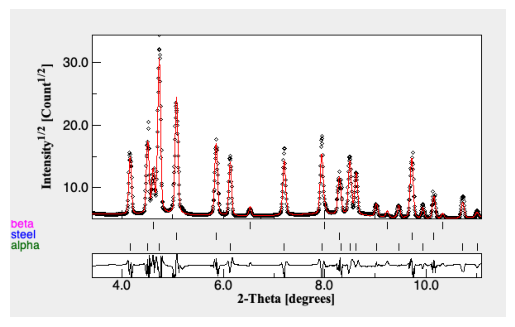

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('run026/step_1/plot1d_detector1.png')
plt.imshow(im)
plt.axis('off')

We can animate the plot using ipywidgets as well.

In [12]:
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt

def plot(wild,step):
    im = Image.open(f'run{wild:03d}/step_{step:d}/plot1d_detector1.png')
    plt.imshow(im);plt.axis('off')

wig_plot = interact(plot, wild = widgets.IntSlider(value=0, min=0, max=27, step=1), step = widgets.IntSlider(value=1, min=1, max=int(maudText.cur_step)-1, step=1))

interactive(children=(IntSlider(value=0, description='wild', max=27), IntSlider(value=1, description='step', m…

# Sequential refinements
The main parameter we want to be sequentially solved for are the lattice parameters. Our template file has good lattice parameters already for run027, which is after a heating cycle near room temp when we have alpha, beta, and steel phases present. We'll setup a reverse sequential analysis. Using the widget above we can identify regions of no beta, no alpha and a mixture of alpha and beta. In MAUD if a volume fraction is set to zero it will be excluded from the refinement completely

In [13]:
editor.ifile = 'After_setup.par'
p = {'alpha': '0', 'steel':'1', 'beta':'2'}

no_beta = list(range(0, 4))
for wild in no_beta:
    # editor.set_val(key='_pd_phase_atom_', loopid=p['alpha'],
    #                 value='0.5', wild=[wild])
    # editor.set_val(key='_pd_phase_atom_', loopid=p['steel'],
    #                 value='0.5', wild=[wild])
    editor.set_val(key='_pd_phase_atom_', loopid=p['beta'],
                    value='0.0', wild=[wild])

no_alpha = list(range(9, 19))
for wild in no_alpha:
    editor.set_val(key='_pd_phase_atom_', loopid=p['alpha'],
                    value='0.0', wild=[wild])
    # editor.set_val(key='_pd_phase_atom_', loopid=p['steel'],
    #                 value='0.5', wild=[wild])
    # editor.set_val(key='_pd_phase_atom_', loopid=p['beta'],
    #                 value='0.5', wild=[wild])


We also need to increase the number of background parameters to deal with the high temp background.

In [14]:
# Add shared background and free 
#===================================================#
set_dataset_wild(dataset["run"], editor, maudText)
# for _ in range(0, 4):
#     editor.add_loop_par(key='_riet_par_background_pol',
#                         nsobj='chi(')  # Add shared background only
# editor.free(key='Background')


The sequential fit can now be done. We don't need a complete refinement for each case, just enough for the lattice parameters to evolve appropriately. Then we can do the final refinements in parallel.

In [15]:
from tqdm import tqdm
#Starting at the last wild
wild_prev = editor.wild[-1]
for wild in tqdm(reversed(editor.wild), total=len(editor.wild)):
    # Copy lattice parameters from previous
    editor.get_val(key='cell_length_a', wild=[wild_prev])
    a = editor.value
    editor.get_val(key='cell_length_c', wild=[wild_prev])
    c = editor.value
    editor.set_val(key='cell_length_a', value=a[int(p['alpha'])], sobj='alpha', wild=[wild])
    editor.set_val(key='cell_length_c', value=c[int(p['alpha'])], sobj='alpha')
    editor.set_val(key='cell_length', value=a[int(p['steel'])], sobj='steel')
    editor.set_val(key='cell_length', value=a[int(p['beta'])], sobj='beta')

    # Free phase fractions and refine
    editor.free(key='_pd_phase_atom_', wild=[wild])
    if wild in no_alpha:
        editor.fix(key='_pd_phase_atom_', loopid=p['alpha'])
    elif wild in no_beta:
        editor.fix(key='_pd_phase_atom_', loopid=p['beta'])

    maudText.wild = [wild]
    maudText.refinement(itr='4', ifile=editor.ifile,
                        inc_step=False, simple_call=True)

    # Conditionally free lattice parameters and refine
    if wild not in no_alpha:
        editor.free(key='cell_length_a', sobj='alpha')
        editor.free(key='cell_length_c', sobj='alpha')

    editor.free(key='cell_length_a', sobj='steel')

    if wild not in no_beta:
        editor.free(key='cell_length_a', sobj='beta')
    
    maudText.refinement(itr='6', ifile=editor.ifile, ofile='After_seq1.par',
                        inc_step=False, simple_call=True)
    
    #Set previous to current wild for sequential copy
    wild_prev = wild

100%|██████████| 28/28 [02:45<00:00,  5.91s/it]


In [16]:
#consolodate results
editor.ifile='After_seq1.par'; maudText.cur_step='2'
set_dataset_wild(dataset["run"], editor, maudText)
editor.free(key='_riet_par_background_peak_height')
editor.set_val(key='_riet_par_background_peak_hwhm',value='10.0')
editor.set_val(key='_riet_par_background_peak_hwhm',value='0.6')
maudText.refinement(itr='8', ifile=editor.ifile, ofile='After_seq2.par',
                    inc_step=True, export_plots=True)


Starting MAUD refinement for step: 2, at: 14:35:17, July 24


100%|██████████| 28/28 [00:47<00:00,  1.68s/it]


Archiving step data
+------------------------+-----------+--+
|         Title          |   Rwp(%)  |  |
+------------------------+-----------+--+
| run000Ti64_test_data02 | 13.862096 |  |
| run001Ti64_test_data02 | 13.958685 |  |
| run002Ti64_test_data02 | 14.021036 |  |
| run003Ti64_test_data02 | 13.984479 |  |
| run004Ti64_test_data02 | 13.245336 |  |
| run005Ti64_test_data02 | 13.326239 |  |
| run006Ti64_test_data02 | 13.090711 |  |
| run007Ti64_test_data02 | 12.905153 |  |
| run008Ti64_test_data02 | 12.797298 |  |
| run009Ti64_test_data02 | 16.358847 |  |
| run010Ti64_test_data02 | 15.873763 |  |
| run011Ti64_test_data02 | 14.206492 |  |
| run012Ti64_test_data02 |  13.43026 |  |
| run013Ti64_test_data02 | 13.098042 |  |
| run014Ti64_test_data02 | 14.208012 |  |
| run015Ti64_test_data02 | 14.161073 |  |
| run016Ti64_test_data02 | 14.123237 |  |
| run017Ti64_test_data02 | 14.175783 |  |
| run018Ti64_test_data02 | 14.199727 |  |
| run019Ti64_test_data02 | 19.118752 |  |
| run020Ti64_

We can do a final refinement refining some parameter such as broadening only if the volume fractions are large enough 

In [17]:
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt

def plot(wild,step):
    im = Image.open(f'run{wild:03d}/step_{step:d}/plot1d_detector1.png')
    plt.imshow(im); plt.axis('off')

wig_plot = interact(plot, wild = widgets.IntSlider(value=0, min=0, max=27, step=1), step = widgets.IntSlider(value=1, min=1, max=int(maudText.cur_step), step=1))

interactive(children=(IntSlider(value=0, description='wild', max=27), IntSlider(value=1, description='step', m…

In [18]:
editor.ifile='After_seq2.par'; maudText.cur_step='3'
for wild in editor.wild:
    editor.get_val(key='_pd_phase_atom_', wild=[wild])
    for vol,pname in zip(editor.value,p.keys()):
        if float(vol) > 0.01:
            editor.free(key='_rita_harmonic_parameter', sobj=pname)
            editor.free(key='MicroStrain', sobj=pname)
            # editor.free(key='CrystSize', sobj=pname)

editor.free(key='_riet_par_background_peak_hwhm')
maudText.refinement(itr='8', export_plots=True,
                    ifile=editor.ifile, ofile='After_seq3.par')


Starting MAUD refinement for step: 3, at: 14:36:05, July 24


100%|██████████| 28/28 [00:49<00:00,  1.75s/it]


Archiving step data
+------------------------+-----------+--+
|         Title          |   Rwp(%)  |  |
+------------------------+-----------+--+
| run000Ti64_test_data03 |  8.126692 |  |
| run001Ti64_test_data03 |  8.218062 |  |
| run002Ti64_test_data03 |  8.278415 |  |
| run003Ti64_test_data03 |  8.235716 |  |
| run004Ti64_test_data03 | 10.007942 |  |
| run005Ti64_test_data03 |  9.388482 |  |
| run006Ti64_test_data03 |  9.71544  |  |
| run007Ti64_test_data03 |  9.15673  |  |
| run008Ti64_test_data03 |  9.063314 |  |
| run009Ti64_test_data03 | 12.844193 |  |
| run010Ti64_test_data03 |  12.18345 |  |
| run011Ti64_test_data03 | 10.028626 |  |
| run012Ti64_test_data03 |  8.568404 |  |
| run013Ti64_test_data03 |  8.286913 |  |
| run014Ti64_test_data03 |  8.396122 |  |
| run015Ti64_test_data03 |  8.319979 |  |
| run016Ti64_test_data03 |  8.331531 |  |
| run017Ti64_test_data03 |  8.383695 |  |
| run018Ti64_test_data03 |  8.437096 |  |
| run019Ti64_test_data03 | 12.637972 |  |
| run020Ti64_

# Plotting results
Plotting results for publication is also an important step in the Rietveld analysis. Most plots endup have certain features e.g. symbols with error bars and often yy-axis. Since the data.csv is in a tidy data format, it may be helpful to see some filtering and plotting of the data.

First we need to define the error propagation functions for strains and temp calculations and define the temperature function for SS316.

In [19]:
import numpy as np
def error_divmult(Q: float, par: list[float], pare: list[float]) -> float:
    """Propagates the error for addition."""
    # see https://www.statisticshowto.com/error-propagation/
    sum_div = 0
    for p, pe in zip(par, pare):
        if p != 0:
            sum_div += (pe/p)**2
    return abs(Q)*np.sqrt(sum_div)


def error_sine(theta, thetae) -> float:
    """Propagates the error for sine."""
    # see https://math.stackexchange.com/questions/2653896/error-propagation-for-sine-function-in-terms-of-degrees-and-radians
    return np.cos(theta)*thetae


def error_cos(theta, thetae) -> float:
    """Propagates the error for cos."""
    # see https: // math.stackexchange.com/questions/2653896/error-propagation-for-sine-function-in-terms-of-degrees-and-radians
    return np.sin(theta)*thetae


def error_add(pare: list[float]) -> float:
    """Propagates the error for addition."""
    # see https: // www.statisticshowto.com/error-propagation /
    sum_sq = 0
    for pe in pare:
        sum_sq += (pe)**2
    return np.sqrt(sum_sq)


def error_powers(Q, x, xe, n) -> float:
    """Propagates the error for powers with exact numbers."""
    # see https: // math.stackexchange.com/questions/2653896/error-propagation-for-sine-function-in-terms-of-degrees-and-radians
    if x == 0.0:
        return 0.0
    return abs(Q)*abs(n)*xe/abs(x)
    

def error_roots(Q, x, xe, n) -> float:
    """Propagates the error for roots."""
    # see https: // math.stackexchange.com/questions/2653896/error-propagation-for-sine-function-in-terms-of-degrees-and-radians
    
    return abs(Q)*xe/(abs(x)*abs(n))
 
   
def error_exact(A, xe):
    """Propagates the error for exact Measurement."""
    # see https: // math.stackexchange.com/questions/2653896/error-propagation-for-sine-function-in-terms-of-degrees-and-radians
    return abs(A)*xe


def SS316_temp_cal(strainv: list[float], strainv_err: list[float], T_ref: float) -> list[float]:
    """Convert strain to temp for SS316"""
    temp = np.full((len(strainv),1),np.nan)
    temp_err = np.full((len(strainv),1),np.nan)
    for i, (strain,strain_err) in enumerate(zip(strainv,strainv_err)):
        temp[i] = T_ref + 63032*strain/1e6 - 1003300*(strain/1e6)**2 + 20171000*(strain/1e6)**3
        temp_err1 = 63032*strain_err/1e6   
        temp_err2 = 1003300*error_powers((strain/1e6)**2, strain/1e6, strain_err/1e6, 2)
        temp_err3 = 20171000*error_powers((strain/1e6)**3, strain/1e6, strain_err/1e6, 3)
        temp_err[i] = error_add([temp_err1, temp_err2, temp_err3])
    
    return temp, temp_err


def calc_phase_fraction(av: list[float], av_e: list[float], bv: list[float],bv_e: list[float]):
    pf = np.full((len(av),1),np.nan)
    pf_e = np.full((len(av),1),np.nan)
    for i, (a,a_e,b,b_e) in enumerate(zip(av,av_e,bv,bv_e)):
        pf[i] = a/(a+b)
        tmp = error_add([a_e, b_e])
        pf_e[i] = error_divmult(pf[i],[a, a+b],[a_e, tmp])
    return pf, pf_e


def strain_cal(parv: list[float], par_ref: float, parv_esd: list[float], par_ref_esd: float, scale: float = 1e6) -> list[float]:
    """Converts lattice parameter to strain (microstrain default)."""
    strain = np.full((len(parv),1),np.nan)
    strain_err = np.full((len(parv),1),np.nan)
    for i, (par,par_esd) in enumerate(zip(parv,parv_esd)):
        strain[i] = (par / par_ref - 1)*scale
        strain_err[i] = scale*error_divmult(par/par_ref, [par, par_ref], [par_esd, par_ref_esd])
    return strain, strain_err

Now we have what we need for a phase fraction vs run id and temperature vs run id plot.

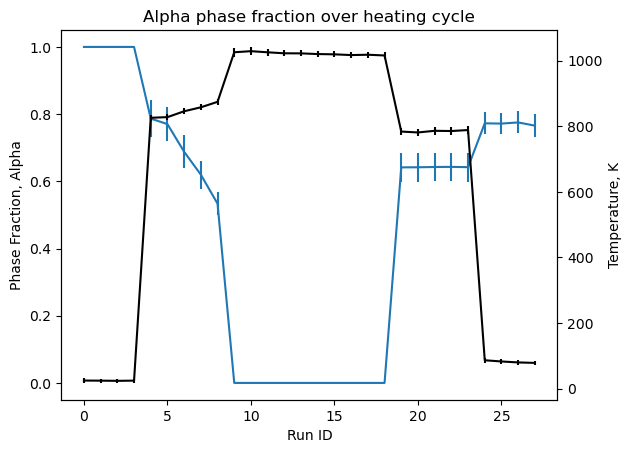

In [20]:
import build_cinema_database
import pandas as pd
import matplotlib.pyplot as plt

build_cinema_database.main()
df = pd.read_csv('data.csv')
df.head()

#Compute alpha phase fraction
df_alpha=df[(df.step==3) & (df.phase_name=='alpha')].reset_index()
df_beta=df[(df.step==3) & (df.phase_name=='beta')].reset_index()
df_steel=df[(df.step==3) & (df.phase_name=='steel')].reset_index()

df_alpha["phase_fraction_corr"],df_alpha["phase_fraction_corr_e"] = calc_phase_fraction(df_alpha.phase_fraction,df_alpha.phase_fraction_e,df_beta.phase_fraction,df_beta.phase_fraction_e)
df_steel['lattice_a_strain'],df_steel['lattice_a_strain_e'] = strain_cal(df_steel['lattice_a'], df_steel['lattice_a'][0], df_steel['lattice_a_e'], df_steel['lattice_a_e'][0])
df_steel["temperature"],df_steel["temperature_e"] = SS316_temp_cal(df_steel['lattice_a_strain'], df_steel['lattice_a_strain_e'], T_ref=25)

plt.figure()
ax1=plt.gca()
ax1.errorbar(df_alpha.index,df_alpha["phase_fraction_corr"],df_alpha["phase_fraction_corr_e"]*2.0)
ax1.set_xlabel("Run ID")
ax1.set_ylabel("Phase Fraction, Alpha")


ax2 = ax1.twinx()
ax2.errorbar(df_steel.index,df_steel["temperature"],df_steel["temperature_e"]*2.0,color='k')
ax2.set_ylabel("Temperature, K")
ax2.set_title("Alpha phase fraction over heating cycle")
plt.show()

We might want to look at recovery of dislocations on heating alpha to the beta transis.

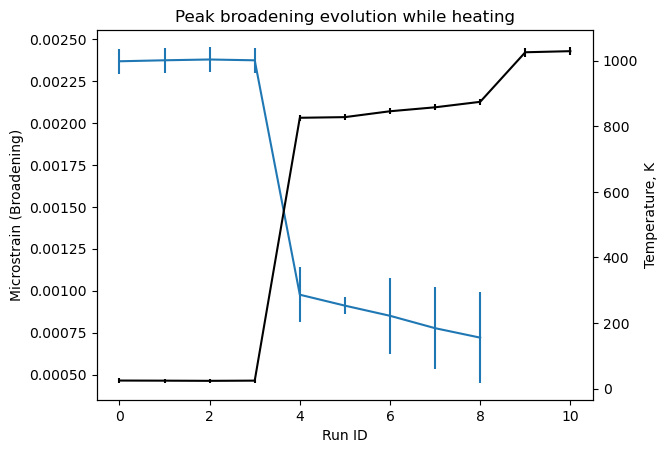

In [21]:
df_alpha_heating = df_alpha[df_alpha.index<9].reindex()
df_steel_heating = df_steel[df_steel.index<11].reindex()
plt.figure()
ax1=plt.gca()
ax1.errorbar(df_alpha_heating.index,df_alpha_heating["microstrain"],df_alpha_heating["microstrain_e"]*2.0)
ax1.set_xlabel("Run ID")
ax1.set_ylabel("Microstrain (Broadening)")


ax2 = ax1.twinx()
ax2.errorbar(df_steel_heating.index,df_steel_heating["temperature"],df_steel_heating["temperature_e"]*2.0,color='k')
ax2.set_ylabel("Temperature, K")
ax2.set_title("Peak broadening evolution while heating")
plt.show()